In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
nba_data = pd.read_csv('C://Users/User/Downloads/asket.csv')

In [3]:
nba_data.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0


In [4]:
nba_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 14 columns):
Active season        1155 non-null int64
Player               1155 non-null object
Team                 1155 non-null object
Conference           771 non-null object
Date                 1155 non-null object
Position             1155 non-null object
Height               1155 non-null object
Weight               1155 non-null int64
Age                  1155 non-null int64
Draft Year           1155 non-null int64
Seasons in league    1155 non-null int64
Season               1155 non-null object
Season short         1155 non-null int64
Real_value           1155 non-null float64
dtypes: float64(1), int64(6), object(7)
memory usage: 126.4+ KB


In [6]:
nba_data.describe()

,Active season,Weight,Age,draft_year,Seasons in league,Season short,Real_value
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,0.008658,226.038095,26.772294,1997.372294,5.870130,2004.339394,0.666234
std,0.092685,31.590100,3.393478,9.442516,3.265082,9.485598,0.235651
min,0.000000,150.000000,19.000000,1969.000000,0.000000,1985.000000,0.500000
25%,0.000000,205.000000,24.000000,1991.000000,3.000000,1997.000000,0.500000
50%,0.000000,225.000000,26.000000,1998.000000,6.000000,2006.000000,0.500000
75%,0.000000,250.000000,29.000000,2004.000000,8.000000,2012.000000,1.000000
max,1.000000,325.000000,40.000000,2016.000000,17.000000,2019.000000,1.000000


In [5]:
nba_data.rename(columns={"Draft Year" : "draft_year"}, inplace=True)

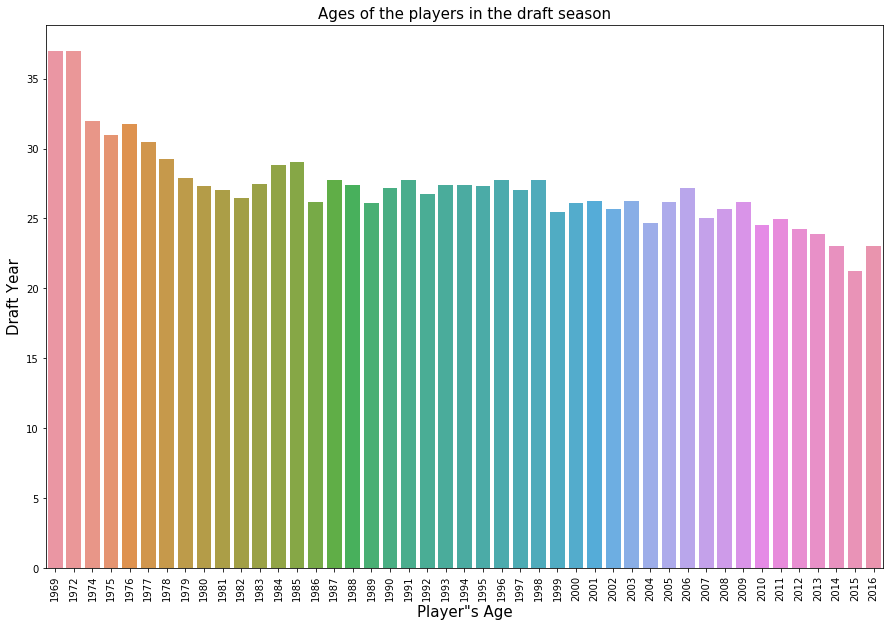

In [7]:
nba_data.Age= nba_data.Age.astype(float)
draft_year_list= list(nba_data['draft_year'].unique())
age_values= []

for i in draft_year_list:
    x= nba_data[nba_data['draft_year']==i]
    age_rate = sum(x.Age)/len(x)
    age_values.append(age_rate)

data = pd.DataFrame({'draft_year_list': draft_year_list, 'age_values':age_values})
new_index = (data['age_values'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

#Visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['draft_year_list'], y=sorted_data['age_values'])
plt.xticks(rotation= 90)
plt.xlabel('Player"s Age', size=15)
plt.ylabel('Draft Year', size=15)
plt.title('Ages of the players in the draft season', size=15)
plt.show()

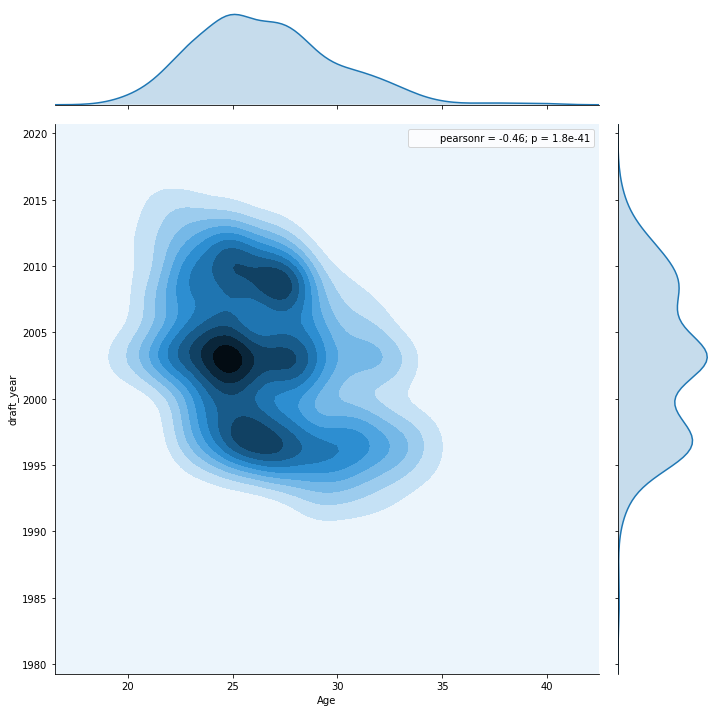

In [15]:
g = sns.jointplot(nba_data.Age, nba_data.draft_year, kind='kde', size=10)
plt.show()

In [10]:
nba_data.Team.value_counts().index

Index([u'Los Angeles Lakers', u'San Antonio Spurs', u'Cleveland Cavaliers',
       u'Miami Heat', u'Houston Rockets', u'Utah Jazz', u'Phoenix Suns',
       u'Orlando Magic', u'Golden State Warriors', u'Chicago Bulls',
       u'Boston Celtics', u'Oklahoma City Thunder', u'Denver Nuggets',
       u'Philadelphia Sixers', u'New York Knicks', u'Portland Trail Blazers',
       u'Toronto Raptors', u'Atlanta Hawks', u'New Jersey Nets',
       u'Dallas Mavericks', u'Detroit Pistons', u'Milwaukee Bucks',
       u'Los Angeles Clippers', u'Minnesota Timberwolves', u'Indiana Pacers',
       u'Washington Wizards', u'Sacramento Kings', u'Seattle SuperSonics',
       u'Charlotte Hornets', u'New Orleans Hornets', u'Charlotte Bobcats',
       u'Memphis Grizzlies', u'Washington Bullets', u'New Orleans Pelicans',
       u'Brooklyn Nets'],
      dtype='object')

In [12]:
#The no. of players selected by each team during draft
nba_data.Team.value_counts().values

array([71, 61, 59, 57, 56, 47, 45, 45, 45, 44, 43, 42, 42, 37, 36, 34, 32,
       32, 31, 30, 29, 27, 27, 26, 24, 23, 23, 20, 16, 12, 11,  9,  8,  6,
        5], dtype=int64)

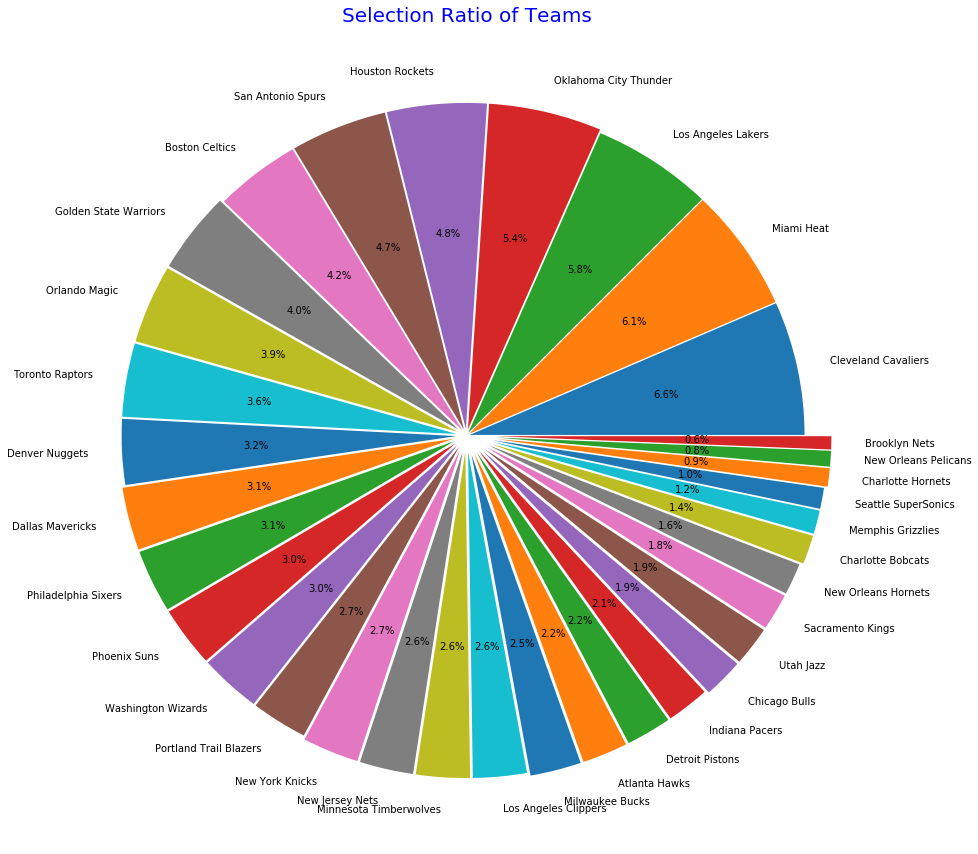

In [22]:
nba_data.dropna(inplace=True)
label = nba_data.Team.value_counts().index
sizes = nba_data.Team.value_counts().values

#Visualization
plt.figure(figsize=(15,15))
explode = (0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.05,0.06,0.06,0.06,0.06,0.07,0.07,0.07,0.07,0.08,0.08,0.08,0.09,0.09,0.09)
plt.pie(sizes, labels=label, autopct='%1.1f%%',explode=explode)

plt.title('Selection Ratio of Teams', color='Blue', fontsize=20)
plt.show()

### Now,lets get to the player of the week

In [23]:
nba_data.Player.value_counts()

LeBron James               61
Kobe Bryant                31
Kevin Durant               26
Allen Iverson              19
Dwyane Wade                19
Russell Westbrook          18
James Harden               18
Tim Duncan                 18
Carmelo Anthony            18
Dwight Howard              18
Dirk Nowitzki              16
Paul Pierce                16
Kevin Garnett              15
Chris Paul                 13
Stephen Curry              13
Tracy McGrady              12
DeMar DeRozan              10
Jason Kidd                 10
LaMarcus Aldridge          10
Chris Bosh                  9
Tony Parker                 8
Steve Nash                  8
Shaquille O'Neal            8
Amar'e Stoudemire           8
Gilbert Arenas              7
Al Jefferson                7
John Wall                   7
Joe Johnson                 7
Vince Carter                7
Pau Gasol                   7
                           ..
Jason Terry                 1
Quentin Richardson          1
Draymond G

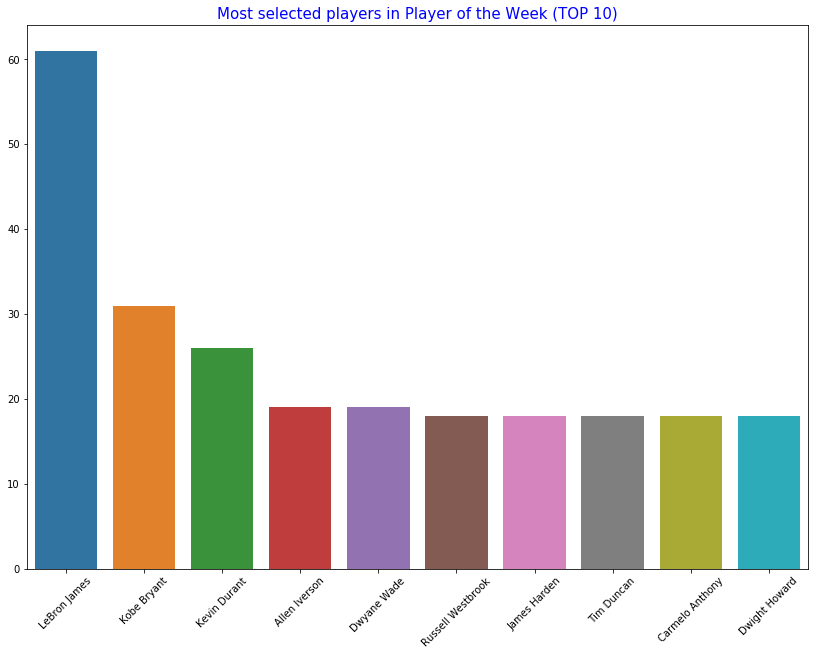

In [24]:
top10 = nba_data.Player.value_counts()
plt.figure(figsize=(14,10))
sns.barplot(x= top10[:10].index, y= top10[:10].values) #[:10]-> We use it to show the top10 players.
plt.xticks(rotation=45)
plt.title('Most selected players in Player of the Week (TOP 10)', color='blue', fontsize=15)
plt.show()

### Lebron james is the king!!

In [27]:
nba_data.Position.value_counts()

G      164
F      117
SG     101
PF      78
FC      76
C       70
SF      60
PG      60
GF      41
G-F      2
F-C      2
Name: Position, dtype: int64

In [28]:
# SF -> Small Forward            ,  FC -> Forward Center          ,  F -> Forward   
# PG -> Point Guard              ,  GF -> Guard  Forward          ,  C -> Center
# G  -> Guard                    ,  PF -> Power Forward           ,  SG -> Shotting Guard
# G-F -> Guard - Forward         ,  F-C -> Forward - Center

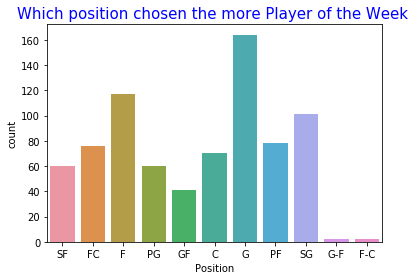

In [26]:
sns.countplot(nba_data.Position)
plt.title('Which position chosen the more Player of the Week ', color='blue', fontsize=15)
plt.show()

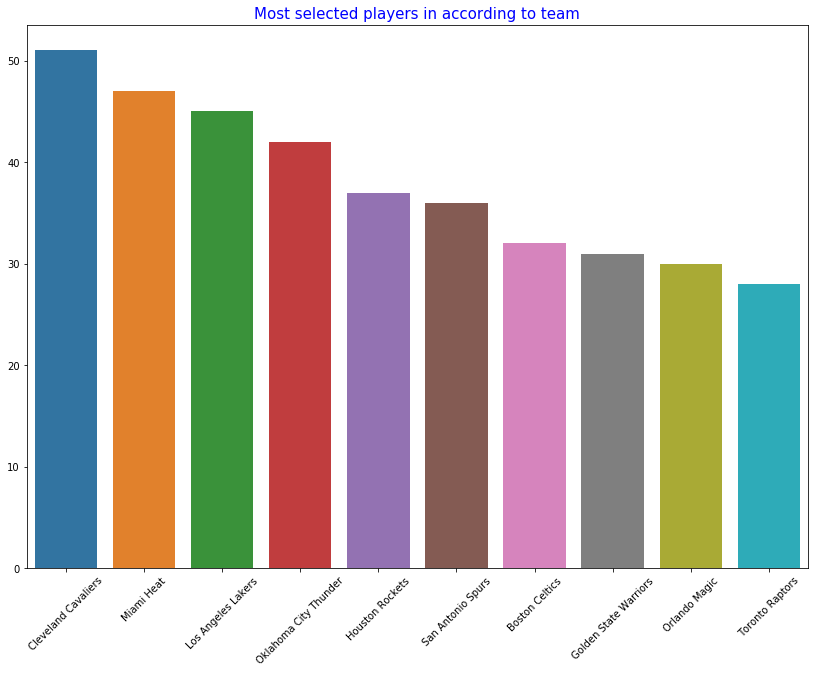

Cleveland Cavaliers      51
Miami Heat               47
Los Angeles Lakers       45
Oklahoma City Thunder    42
Houston Rockets          37
Name: Team, dtype: int64

In [89]:
topteam = nba_data.Team.value_counts()
plt.figure(figsize=(14,10))
sns.barplot(x= topteam[:10].index, y= topteam[:10].values) #[:10]-> We use it to show the top10 players.
plt.xticks(rotation=45)
plt.title('Most selected players in according to team', color='blue', fontsize=15)
plt.show()
topteam.head()

In [94]:
lebron=nba_data[nba_data.Player=='LeBron James']
lebron=lebron['Season short'].value_counts()

In [95]:
lebron

2009    7
2013    6
2012    6
2010    6
2016    5
2011    5
2006    5
2018    4
2017    4
2015    3
2008    3
2005    3
2014    2
2007    2
Name: Season short, dtype: int64

Text(0.5,1,u'Lebron james over the seasons interms of player of the week')

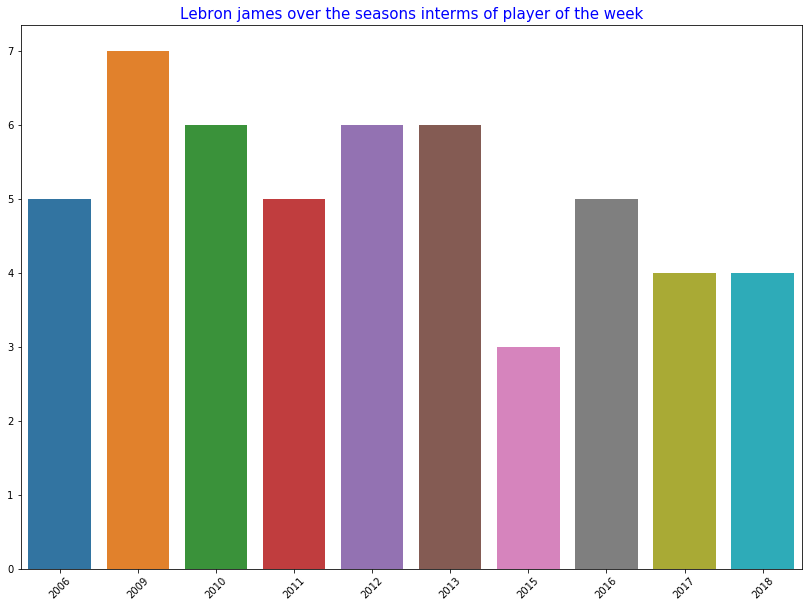

In [98]:
plt.figure(figsize=(14,10))
sns.barplot(x= lebron[:10].index, y= lebron[:10].values) 
plt.xticks(rotation=45)
plt.title('Lebron james over the seasons interms of player of the week', color='blue', fontsize=15)

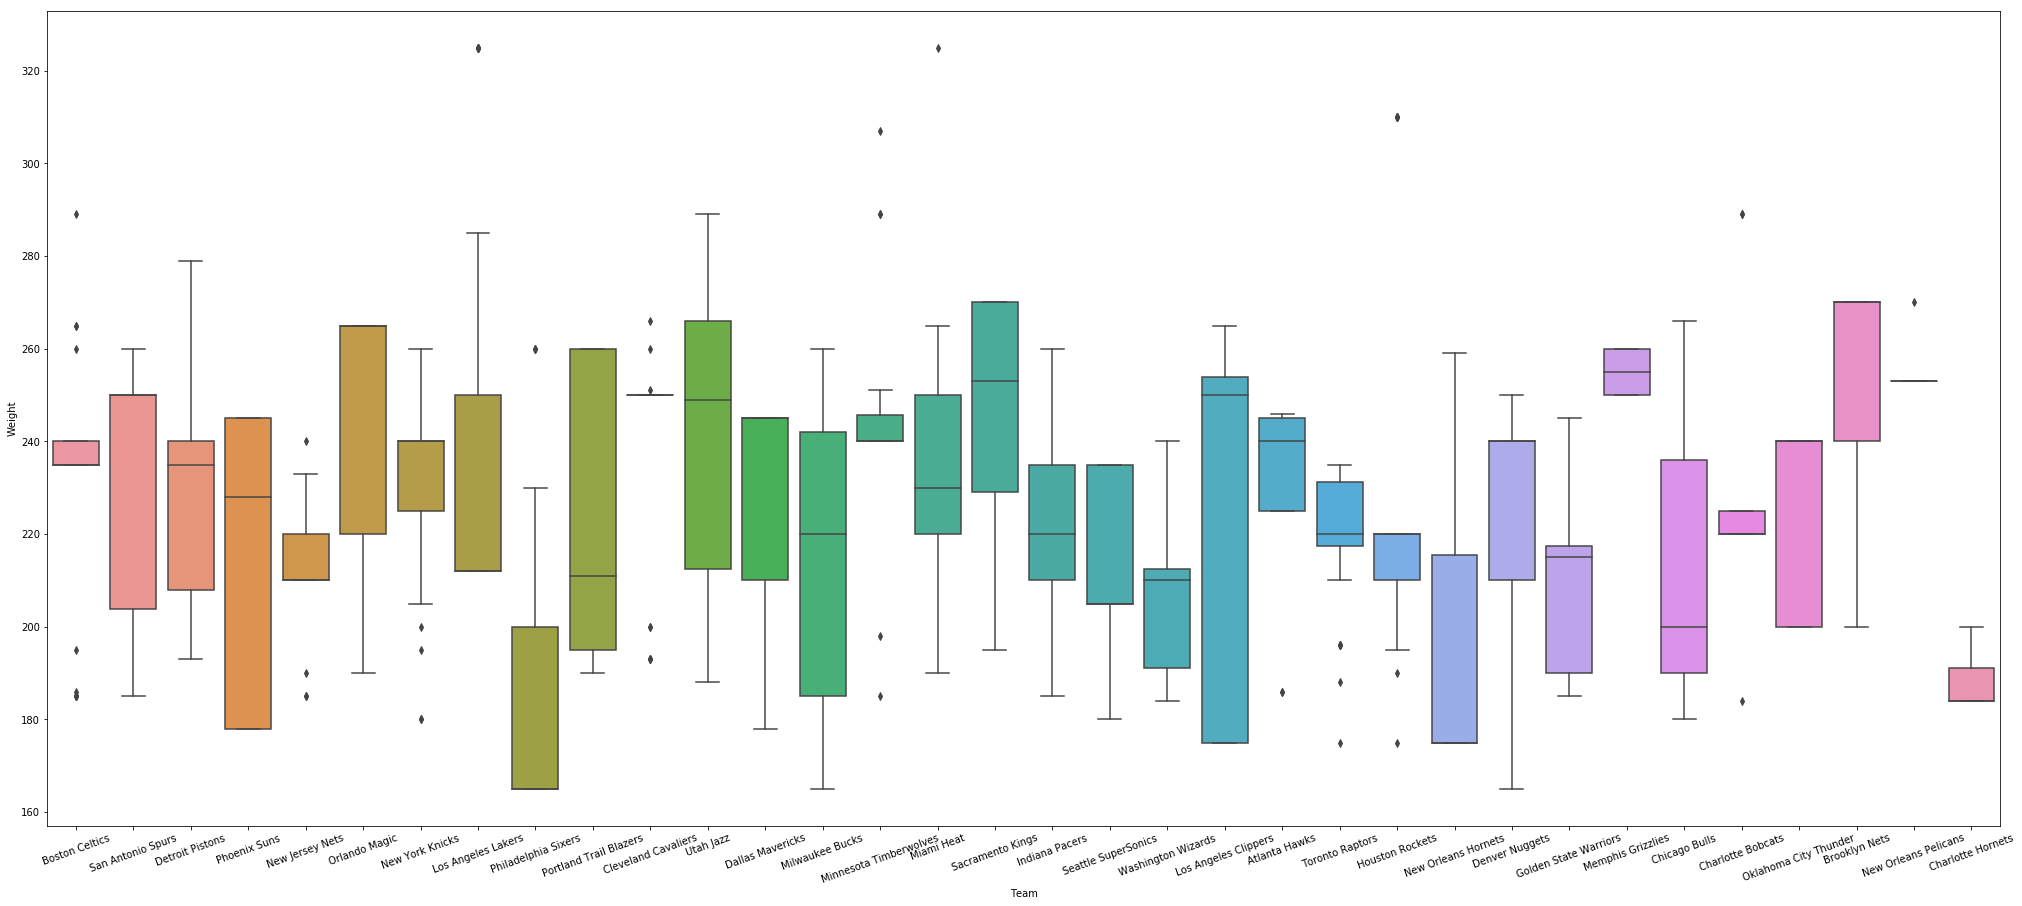

In [113]:
plt.figure(figsize=(35,15))
g = sns.boxplot(y='Weight', x='Team',data=nba_data)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

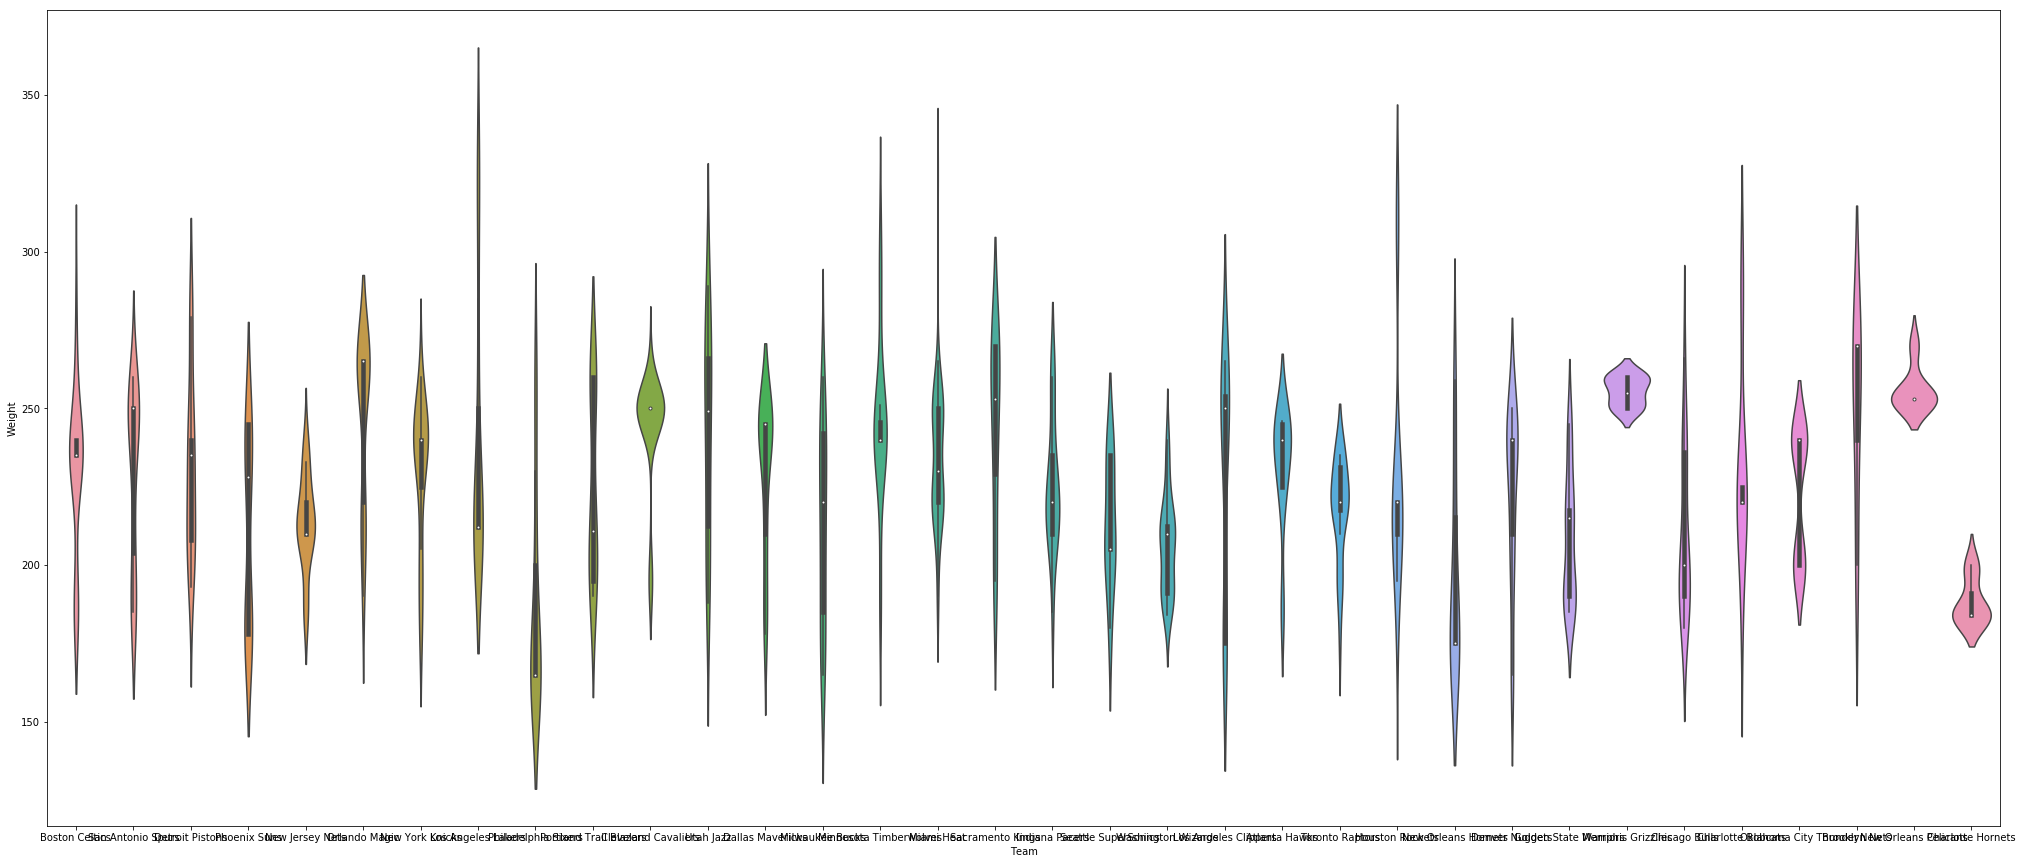

In [115]:
plt.figure(figsize=(35,15))
g = sns.violinplot(y='Weight', x='Team',data=nba_data)
